In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import zscore

In [5]:
cwd = os.getcwd()
df = pd.read_csv(f"{cwd}/7-29_acc_df.csv")
umap_pca_algs = ['pca','$\\alpha = $0.25','$\\alpha = $0.5','$\\alpha = $0.75','umap']
up_df = df[df['algorithm'].isin(umap_pca_algs)]
x_map = {'pca': 0, '$\\alpha = $0.25': 0.25, '$\\alpha = $0.5': 0.5, '$\\alpha = $0.75': 0.75, 'umap': 1}
inv_x_map = {v: k for k, v in x_map.items()}
x = np.linspace(0,1,5)

rt Mean: 0.7555 std: 0.0428
centr Mean: 0.7817 std: 0.0723
knn Mean: 0.7995 std: 0.0888


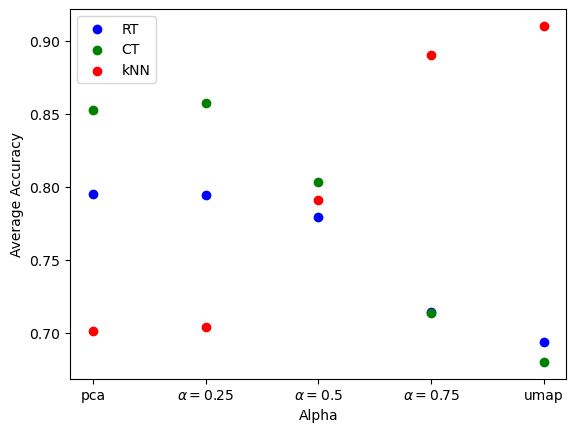

In [12]:
plt.figure()
metrics = ['rt', 'centr', 'knn']
color_map = {'rt': 'blue', 'centr':'green', 'knn':'red'}
label_map = {'rt': 'RT', 'centr':'CT', 'knn': 'kNN'}
metric_df = None
for metric in metrics:
    metric_df = up_df.groupby('algorithm')[metric].mean()# avg of metric
    # misnomer, this is a series    
    y = []
    for x_val in x:
        key = inv_x_map[x_val]
        y_val = metric_df[key]
        y.append(y_val)
    y = np.array(y)
    mu, std = norm.fit(y)
    print(metric, "Mean:", np.round(mu,4), "std:", np.round(std,4))
    plt.scatter(x, y, color=color_map[metric], label= label_map[metric])
plt.xticks(x, x_map.keys())
plt.xlabel('Alpha')  
plt.ylabel('Average Accuracy')
plt.legend()
plt.show()

In [19]:
# get z scores
zdf = df
metrics = ['rt', 'centr', 'knn']
for metric in metrics:
    metric_df = df[metric]
    metric_zscore = zscore(metric_df)
    zdf[metric] = metric_zscore

zdf

,dataset,algorithm,rt,centr,knn,ogf
0,CAFs,pca,0.605279,0.221311,0.602117,0.866480
1,CellMix,pca,1.006354,0.917811,0.775636,0.925344
2,Duo4eq,pca,0.597613,1.266061,-1.662453,0.744959
3,Duo8eq,pca,0.574264,1.208020,-1.576585,0.748391
4,FMNIST,pca,1.844107,1.218573,-1.943088,0.718608
...,...,...,...,...,...,...
65,Kang,$\alpha = $0.75,-0.245775,-1.619266,0.681836,0.755656
66,MNIST,$\alpha = $0.75,-2.059855,0.308374,0.774775,0.886384
67,Muraro,$\alpha = $0.75,-1.502780,-1.457752,0.778726,0.774014
68,TMLung,$\alpha = $0.75,-0.013160,-0.898064,0.620296,0.796563


In [25]:
new_ogf = []
for n in range (len(zdf)):
    entry = zdf.loc[n]
    new_ogf.append((0.25 * entry.rt) + (0.25 * entry.centr) + (0.5 * entry.knn))


In [26]:
zdf['ogf'] = new_ogf

In [27]:
zdf

,dataset,algorithm,rt,centr,knn,ogf
0,CAFs,pca,0.605279,0.221311,0.602117,0.507706
1,CellMix,pca,1.006354,0.917811,0.775636,0.868859
2,Duo4eq,pca,0.597613,1.266061,-1.662453,-0.365308
3,Duo8eq,pca,0.574264,1.208020,-1.576585,-0.342722
4,FMNIST,pca,1.844107,1.218573,-1.943088,-0.205874
...,...,...,...,...,...,...
65,Kang,$\alpha = $0.75,-0.245775,-1.619266,0.681836,-0.125342
66,MNIST,$\alpha = $0.75,-2.059855,0.308374,0.774775,-0.050483
67,Muraro,$\alpha = $0.75,-1.502780,-1.457752,0.778726,-0.350770
68,TMLung,$\alpha = $0.75,-0.013160,-0.898064,0.620296,0.082342
